# Import libs 

In [12]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# Define error function

In [13]:
def J(x:float, y:float) -> float:
    return x**2 + y**2

# 3d plot of error function

In [14]:
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)

X, Y = np.meshgrid(x, y)
Z = J(X, Y)

<IPython.core.display.Javascript object>


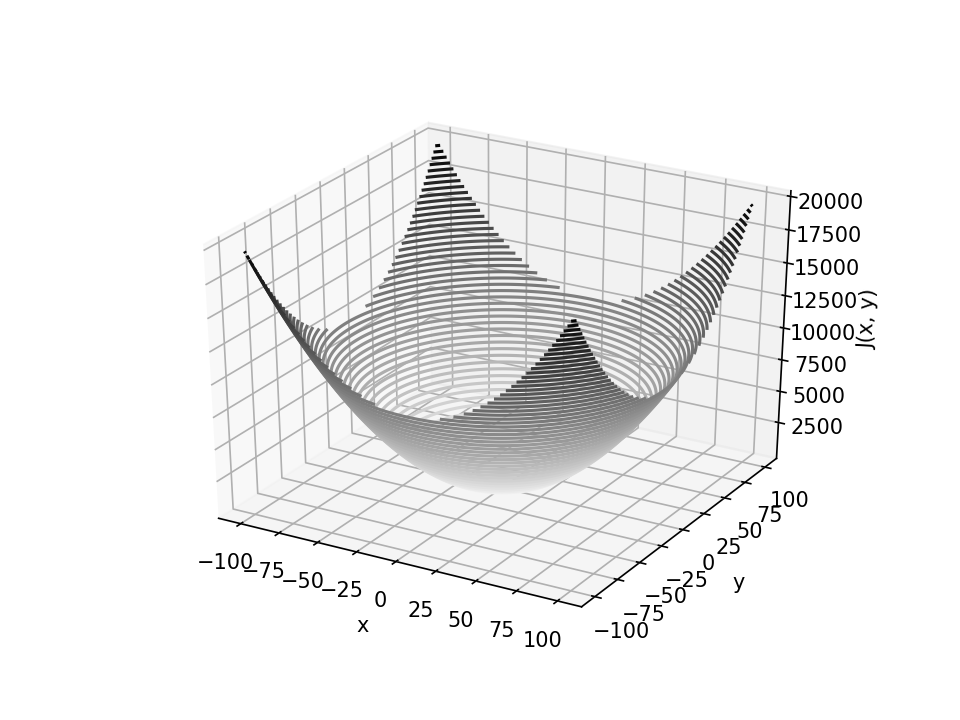

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('J(x, y)')
fig.show()

# rotate the graph below by mouse

# Define gradient

In [16]:
def grad_J(x:float, y:float) -> Tuple[float, float]:
    return 2*x, 2*y

# Gradient checking

Resursa: [http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/](http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/)

$$
\begin{align}
g(\theta) \approx
\frac{J(\theta+{\rm EPSILON}) - J(\theta-{\rm EPSILON})}{2 \times {\rm EPSILON}}.
\end{align}
$$

In [17]:
def approximate_gradient(x: float, y:float) -> Tuple[float, float]:
    eps = 1e-5
    return (J(x+eps, y) - J(x-eps, y)) / (2*eps), (J(x, y+eps) - J(x, y-eps))/(2*eps)

In [18]:
#suprascriere, pentru a include si gardient checking
def grad_J(x:float, y:float) -> Tuple[float, float]:
    result =(2*x, 2*y)
    approximate = approximate_gradient(x, y)
    assert np.allclose(result, approximate)
    return result 

# Define init point, learning params

In [19]:
x_init, y_init = 100, -60
alpha = 0.05
max_error = 1e-5
max_iters = 1000

# Gradient descent

In [20]:
x, y = x_init, y_init

values = [J(x, y)]
current_iter = 0
while True:
    grad_x_y = grad_J(x, y)
    x -= alpha * grad_x_y[0]
    y -= alpha * grad_x_y[1]
    values.append(J(x, y))
    current_iter += 1
    if (abs(values[-1] - values[-2]) < max_error) or (current_iter >= max_iters):
        break

In [21]:
print(f'Numarul de iteratii: {len(values)}')

Numarul de iteratii: 94


In [22]:
print(values)

[13600, 11016.0, 8922.96, 7227.597600000001, 5854.354056, 4742.02678536, 3841.0416961416004, 3111.243773874696, 2520.107456838504, 2041.287040039188, 1653.4425024317422, 1339.288426969711, 1084.823625845466, 878.7071369348275, 711.7527809172104, 576.5197525429403, 466.9809995597817, 378.2546096434232, 306.3862338111728, 248.17284938704998, 201.02000800351047, 162.8262064828435, 131.88922725110325, 106.83027407339365, 86.53252199944885, 70.09134281955357, 56.77398768383839, 45.986930023909096, 37.24941331936637, 30.172024788686763, 24.439340078836274, 19.795865463857382, 16.034651025724482, 12.98806733083683, 10.520334537977833, 8.521470975762046, 6.902391490367256, 5.590937107197476, 4.528659056829956, 3.6682138360322645, 2.971253207186134, 2.4067150978207685, 1.9494392292348222, 1.5790457756802063, 1.279027078300967, 1.0360119334237834, 0.8391696660732644, 0.6797274295193442, 0.5505792179106688, 0.4459691665076417, 0.3612350248711898, 0.2926003701456637, 0.2370062998179876, 0.19197510